# Name: Affan Zulfiqar
# Reg No: B22F0144AI050
# Lab 10


# **Lab Task:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load dataset
df = pd.read_csv('email.csv')

In [ ]:
 #Exploratory Data Analysis (EDA)
# 1:Inspecting the Dataset
# Overview of the data
print(df.head())
print(df.info())
print(df.describe())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30


In [ ]:
#2:b. Check for Missing Values
# Check for missing values
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


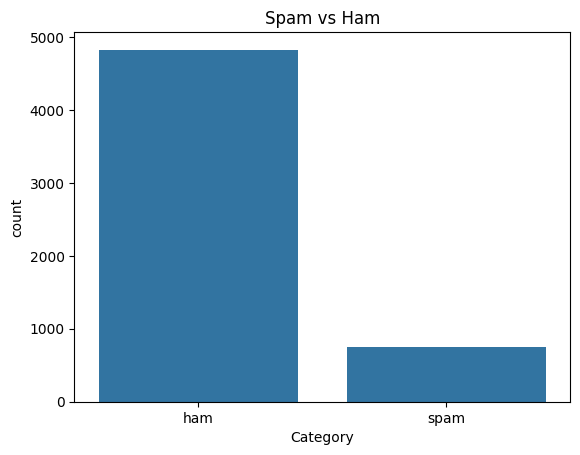

In [ ]:
#3: Check Class Distribution
# Visualize class distribution
sns.countplot(data=df, x='Category')
plt.title("Spam vs Ham")
plt.show()

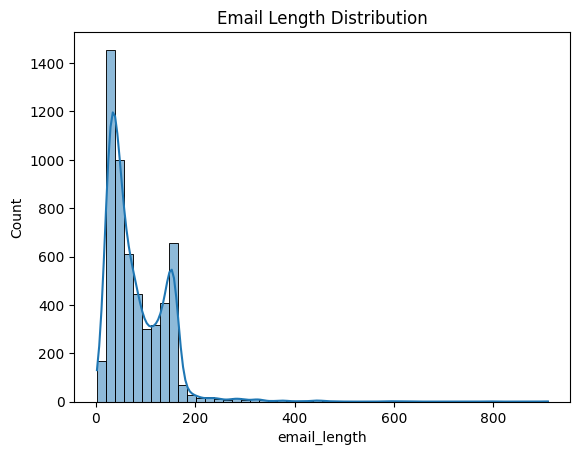

In [ ]:
#4: Checking Email Length
# Add a column for email length
df['email_length'] = df['Message'].apply(len)

# Plot email length distribution
sns.histplot(df['email_length'], bins=50, kde=True)
plt.title("Email Length Distribution")
plt.show()

In [ ]:
#1:  Handle Missing Data
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
#2:  Encode Labels
# Encode spam as 1, ham as 0
df['label'] = df['Category'].map({'spam': 1, 'ham': 0})

In [ ]:
#3: Split Data
# Split dataset into features and target
X = df['Message']
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#4:  Text Vectorization
# Convert text data to numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_transformed, y_train)

MultinomialNB()

In [ ]:
# Model Evaluation
# Make predictions
y_pred = nb_model.predict(X_test_transformed)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



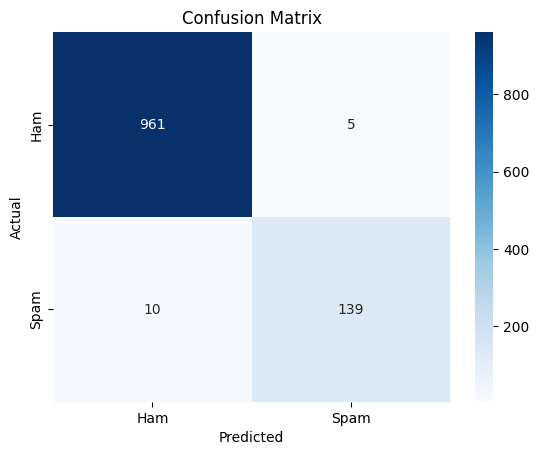

In [ ]:
#Performance Evaluation
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(nb_model, 'naive_bayes_model.pkl')

# Load the model
loaded_model = joblib.load('naive_bayes_model.pkl')

In [ ]:
# Test with a sample email
sample_email = ["Congratulations! You've won a free gift card. Click to claim."]
sample_transformed = vectorizer.transform(sample_email)
sample_pred = loaded_model.predict(sample_transformed)
print("Spam" if sample_pred[0] == 1 else "Ham")

Spam


# **Home Task:**

**Naive bayes on "Sentiment Analysis" dataset.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/train.csv', encoding='latin1')  # Use 'latin1' or another encoding

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0    

In [ ]:
#2:b. Check for Missing Values
# Check for missing values
print(df.isnull().sum())

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


In [ ]:
# Drop rows with missing values
df = df.dropna()

# Features (X) and Labels (y)
X = df['text']
y = df['sentiment']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 21984, Testing samples: 5496


In [ ]:
# Convert text to Bag of Words representation
vectorizer = CountVectorizer()  # You can also use TfidfVectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Feature space size: {X_train_vec.shape}")


Feature space size: (21984, 23059)


In [ ]:
# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vec)


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.65
Confusion Matrix:
[[ 899  586   87]
 [ 353 1534  349]
 [  80  484 1124]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.57      0.62      1572
     neutral       0.59      0.69      0.63      2236
    positive       0.72      0.67      0.69      1688

    accuracy                           0.65      5496
   macro avg       0.66      0.64      0.65      5496
weighted avg       0.65      0.65      0.65      5496



In [ ]:
# Test on new data
new_texts = ["I love the design of this product!", "This is awful and I hate it."]
new_texts_vec = vectorizer.transform(new_texts)

# Predict
predictions = nb_model.predict(new_texts_vec)

# Output results
for text, sentiment in zip(new_texts, predictions):
    print(f"'{text}' => {sentiment}")


'I love the design of this product!' => positive
'This is awful and I hate it.' => negative
